This is an example of a jupyter notebook, running using the `pixi` environment we created to manage our dependencies. Note that you may need to change your python interpreter (top right corner) to:
`.pixi/envs/default/bin/python`

In [1]:
import os
import glob
import re
import pandas as pd
import numpy as np
import random
import torch
import sklearn

#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'

from sklearn.metrics import roc_auc_score
from opensoundscape.ml import bioacoustics_model_zoo as bmz
from opensoundscape.ml.shallow_classifier import quick_fit 

Pre-processing

In [2]:
datapath = "/workspaces/non-avian-ml-toy/data/audio"
species = "bullfrog"
datatype = "data"

files = glob.glob(os.path.join(datapath, species, datatype, "**/*.wav"), recursive=True)
labels = pd.DataFrame({"file": files, "present": ["pos" in f.lower() for f in files]})

# Do this step ONLY to convert to 5 second dataset to run perch!!!!
#labels['file'] = labels['file'].apply(lambda x: re.sub(r'data', 'data_5s', x, count=2).replace('data_5s', 'data', 1)) 

labels['file'] = labels['file'].astype(str)
labels.set_index("file", inplace=True)

pd.set_option('display.max_colwidth', 100)
print(labels.head())

                                                                                           present
file                                                                                              
/workspaces/non-avian-ml-toy/data/audio/bullfrog/data/pos/bullfrog-pos-t-11113588_154.wav     True
/workspaces/non-avian-ml-toy/data/audio/bullfrog/data/pos/bullfrog-pos-t-11113588_149.wav     True
/workspaces/non-avian-ml-toy/data/audio/bullfrog/data/pos/bullfrog-pos-t-11113588_145.wav     True
/workspaces/non-avian-ml-toy/data/audio/bullfrog/data/pos/bullfrog-pos-t-11113588_151.wav     True
/workspaces/non-avian-ml-toy/data/audio/bullfrog/data/pos/bullfrog-pos-t-11113588_152.wav     True


In [3]:
labels_train, labels_val = sklearn.model_selection.train_test_split(labels[['present']])

Run Models

In [4]:
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

In [5]:
model = torch.hub.load('kitzeslab/bioacoustics-model-zoo', "BirdNET", trust_repo=True)

Downloading: "https://github.com/kitzeslab/bioacoustics-model-zoo/zipball/main" to /root/.cache/torch/hub/main.zip
2025-02-28 20:35:01.747800: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-28 20:35:01.848745: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-28 20:35:02.286202: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-28 20:35:02.286330: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-28 20:35:02.288597: E te

File BirdNET_GLOBAL_6K_V2.4_Labels_af.txt already exists; skipping download.
downloading model from URL...
File BirdNET_GLOBAL_6K_V2.4_Model_FP16.tflite already exists; skipping download.


/workspaces/non-avian-ml-toy/.pixi/envs/default/lib/python3.10/site-packages/opensoundscape/ml/cnn.py:621: UserWarning: 
                    This architecture is not listed in opensoundscape.ml.cnn_architectures.ARCH_DICT.
                    It will not be available for loading after saving the model with .save() (unless using pickle=True). 
                    To make it re-loadable, define a function that generates the architecture from arguments: (n_classes, n_channels) 
                    then use opensoundscape.ml.cnn_architectures.register_architecture() to register the generating function.

                    The function can also set the returned object's .constructor_name to the registered string key in ARCH_DICT
                    to avoid this warning and ensure it is reloaded correctly by opensoundscape.ml.load_model().

                    See opensoundscape.ml.cnn_architectures module for examples of constructor functions
                    
  warnings.warn(
/workspa

In [6]:
emb_train = model.embed(labels_train, return_dfs=False, batch_size=128, num_workers=0)
emb_val = model.embed(labels_val, return_dfs=False, batch_size=128, num_workers=0)

model.change_classes(['present'])

/workspaces/non-avian-ml-toy/.pixi/envs/default/lib/python3.10/site-packages/opensoundscape/utils.py:341: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  clips[label_df.columns] = label_df.loc[f]
/workspaces/non-avian-ml-toy/.pixi/envs/default/lib/python3.10/site-packages/opensoundscape/utils.py:341: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  clips[label_df.columns] = label_df.loc[f]
/workspaces/non-avian-ml-toy/.pixi/envs/default/lib/python3.10/site-packages/opensoundscape/utils.py:341: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treat

  0%|          | 0/1 [00:00<?, ?it/s]

/workspaces/non-avian-ml-toy/.pixi/envs/default/lib/python3.10/site-packages/opensoundscape/utils.py:341: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  clips[label_df.columns] = label_df.loc[f]
/workspaces/non-avian-ml-toy/.pixi/envs/default/lib/python3.10/site-packages/opensoundscape/utils.py:341: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  clips[label_df.columns] = label_df.loc[f]
/workspaces/non-avian-ml-toy/.pixi/envs/default/lib/python3.10/site-packages/opensoundscape/utils.py:341: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treat

  0%|          | 0/1 [00:00<?, ?it/s]

In the prior step is where the kernel crashes while embedding, apparently could be caused by a package installation issue with tensorflow or numpy (https://github.com/microsoft/vscode-jupyter/wiki/Kernel-crashes) 

Error: "The Kernel crashed while executing code in the current cell or a previous cell. Please review the code in the cell(s) to identify a possible cause of the failure."

In [7]:
quick_fit(model.network, emb_train, labels_train.values, emb_val, labels_val.values, steps=1000)

Epoch 100/1000, Loss: 0.02208191156387329, Val Loss: 0.10713246464729309
val AU ROC: 1.000
val MAP: 1.000
Epoch 200/1000, Loss: 0.008798674680292606, Val Loss: 0.07046708464622498
val AU ROC: 1.000
val MAP: 1.000
Epoch 300/1000, Loss: 0.004959261044859886, Val Loss: 0.05488606542348862
val AU ROC: 1.000
val MAP: 1.000
Epoch 400/1000, Loss: 0.003255391726270318, Val Loss: 0.045898135751485825
val AU ROC: 1.000
val MAP: 1.000
Epoch 500/1000, Loss: 0.0023299751337617636, Val Loss: 0.03991689905524254
val AU ROC: 1.000
val MAP: 1.000
Epoch 600/1000, Loss: 0.0017633463721722364, Val Loss: 0.0355866402387619
val AU ROC: 1.000
val MAP: 1.000
Epoch 700/1000, Loss: 0.0013875438598915935, Val Loss: 0.03227182477712631
val AU ROC: 1.000
val MAP: 1.000
Epoch 800/1000, Loss: 0.00112373277079314, Val Loss: 0.02963181585073471
val AU ROC: 1.000
val MAP: 1.000
Epoch 900/1000, Loss: 0.0009303547558374703, Val Loss: 0.027465838938951492
val AU ROC: 1.000
val MAP: 1.000
Epoch 1000/1000, Loss: 0.000783856

In [8]:
predictions = model.network(torch.tensor(emb_val).float()).detach().numpy()
score = roc_auc_score(labels_val.values, predictions, average=None)

/workspaces/non-avian-ml-toy/.pixi/envs/default/lib/python3.10/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


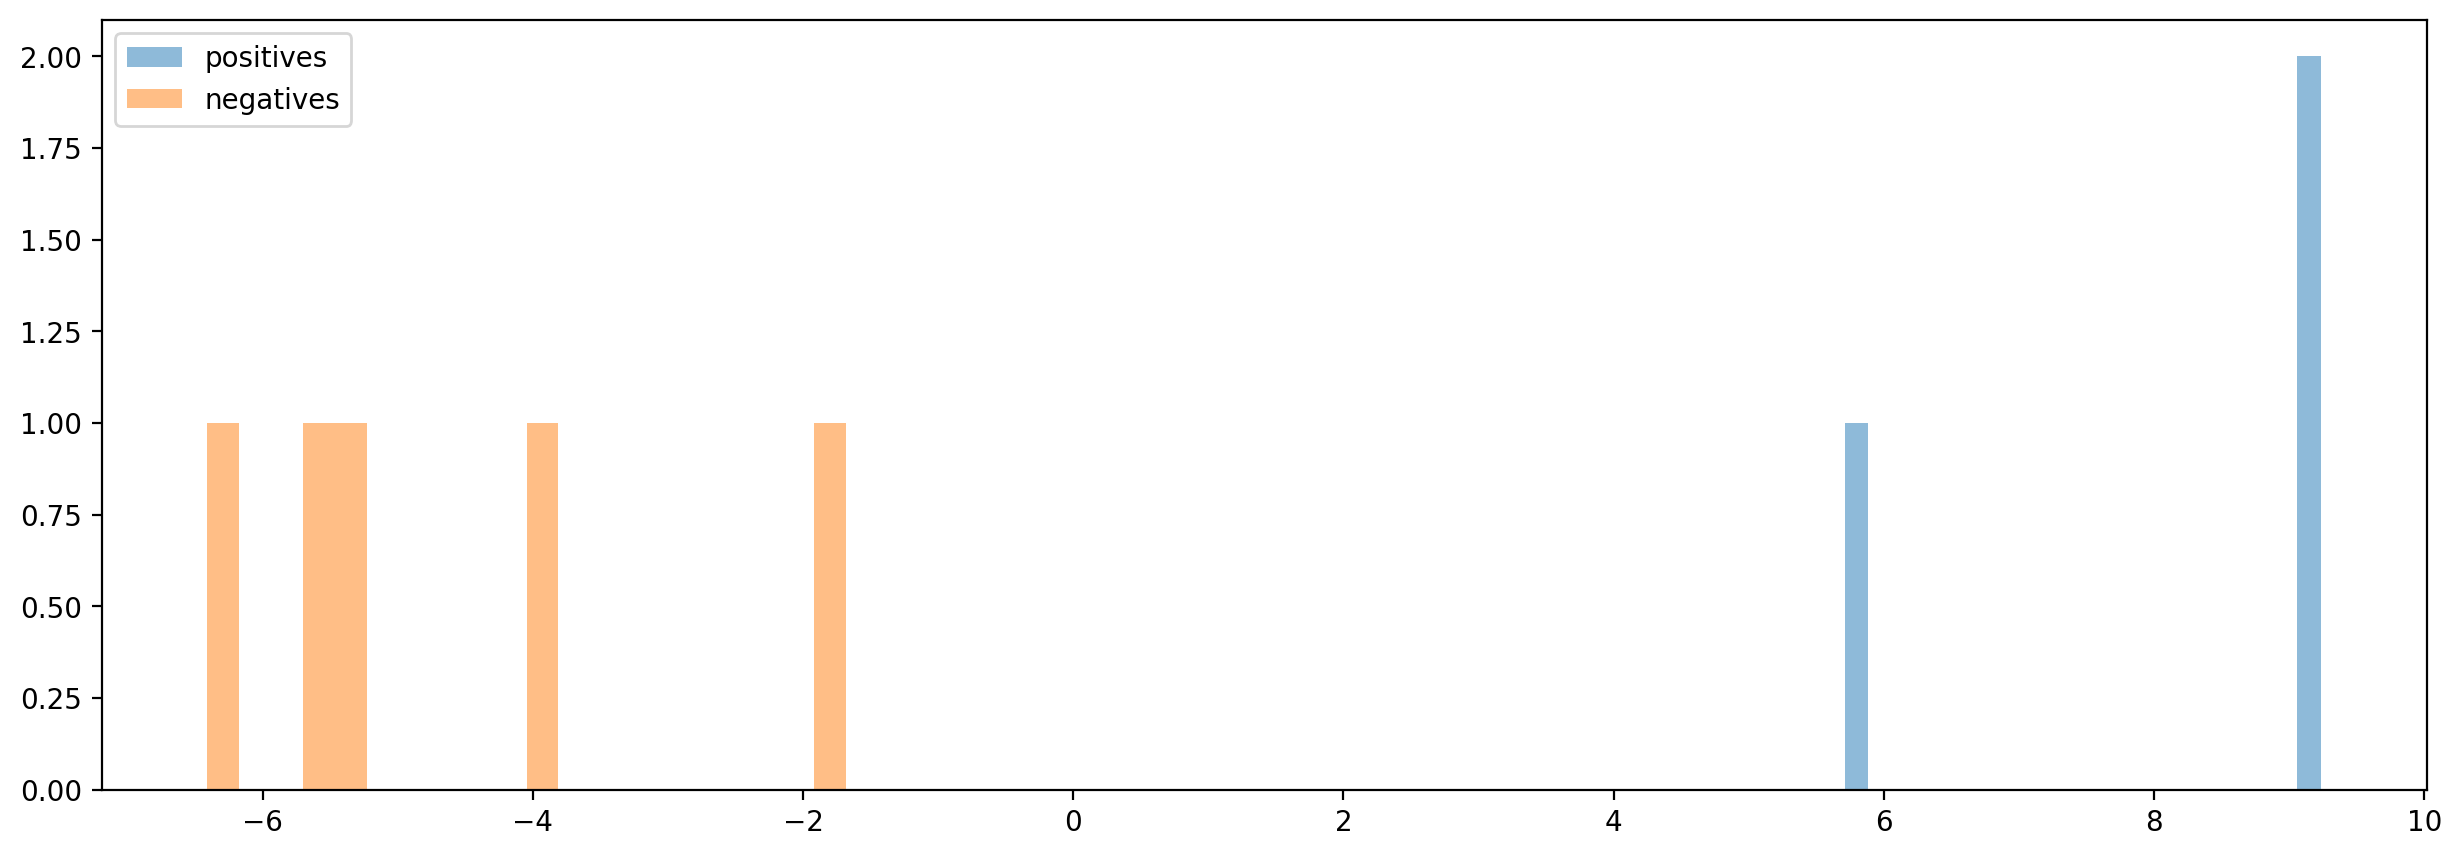

In [9]:
plt.hist(predictions[labels_val==True],bins=20,alpha=0.5,label='positives')
plt.hist(predictions[labels_val==False],bins=20,alpha=0.5,label='negatives')
plt.legend()